<a href="https://colab.research.google.com/github/IBmirnga/LinearRegression-CaseStudy/blob/main/LinearRegression_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
file_path = "/content/housing.csv"

In [ ]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# Check for missing values
missing_value = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_value / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_value)
print("\n \Percentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 \Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
#Remove rows with missing values
data_cleaned = data.dropna()

#Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


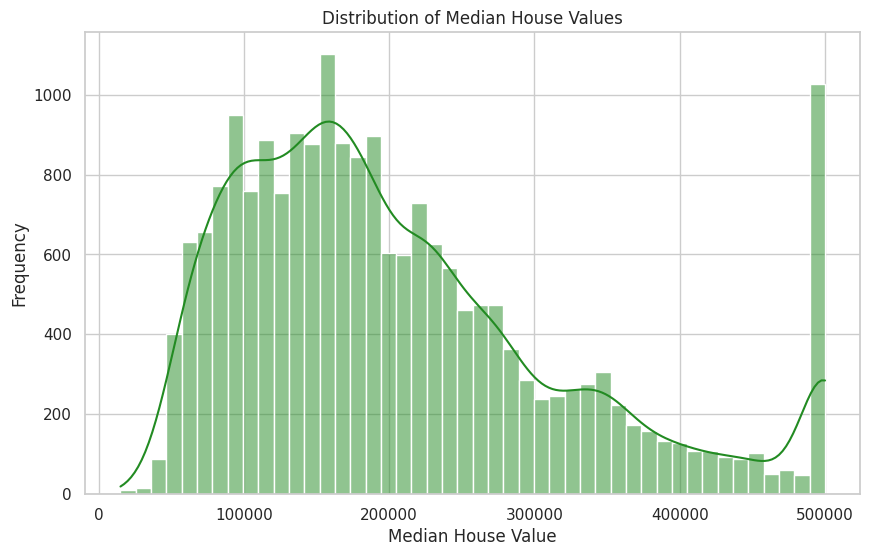

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned["median_house_value"].quantile(0.25)
print(Q1)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]

# Check the shape of the data before and after removing outliers
print("Original data shape", data_cleaned.shape)
print(" data shape", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape (20433, 10)
 data shape (19369, 10)


BoxPlot for Outlier Detection

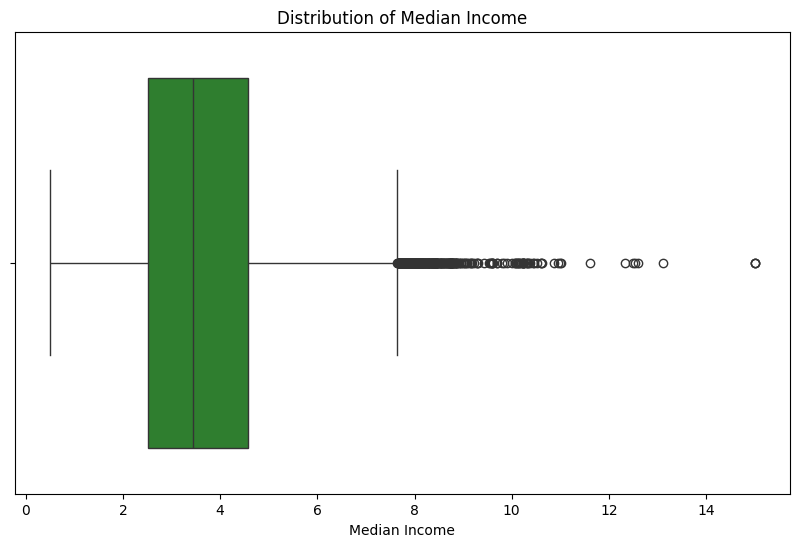

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1["median_income"], color="forestgreen")
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = data_cleaned["median_income"].quantile(0.25)
print(Q1)
Q3 = data_cleaned["median_income"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_cleaned[(data_cleaned["median_income"] >= lower_bound) & (data_cleaned["median_income"] <= upper_bound)]

# Check the shape of the data before and after removing outliers
print("Original data shape", data_cleaned.shape)
print(" data shape", data_no_outliers_2.shape)

2.5637
4.744
Original data shape (20433, 10)
 data shape (19763, 10)


In [ ]:
data = data_no_outliers_2
#data = data.select_dtypes(include=[np.number])
#data.dropna()
#corr_matrix = data.corr()
#print(corr_matrix)

Correlation HeatMap

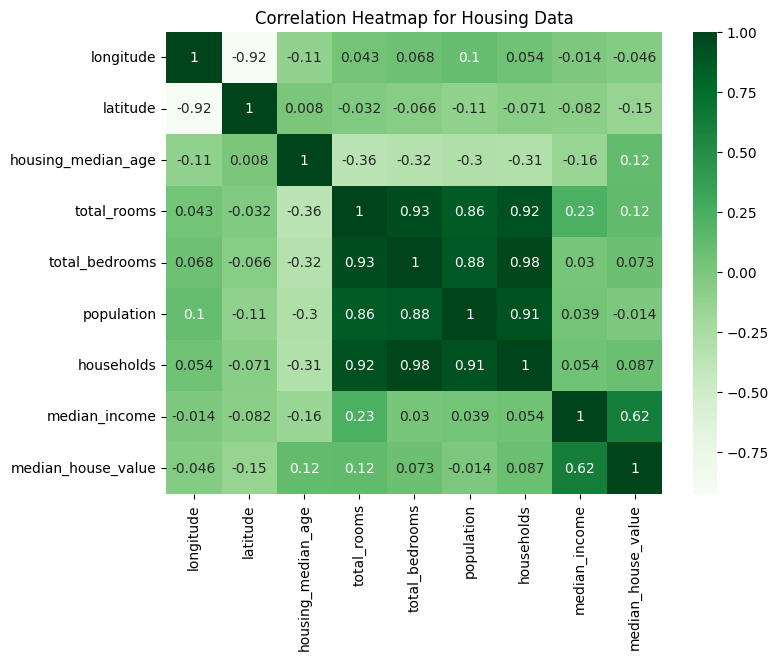

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap for Housing Data")
plt.show()

In [ ]:
data = data.drop("total_bedrooms", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
# Unique value count for categorical data
for column in ["ocean_proximity"]: # Add other categorical columns if any
    print(f"Unique value in (column):", data[column].unique())

Unique value in (column): ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


String Data Categorization to Dummy Variables

In [ ]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix="ocean_proximity").astype(int)
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop("ocean_proximity_ISLAND", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


Splitting the Data into Train/Test

In [ ]:
# Define your features (independent variable) and target (dependent variable)
features = ["longitude", "latitude", "housing_median_age", "total_rooms",
            "population", "households", "median_income", "ocean_proximity_<1H OCEAN",
            "ocean_proximity_INLAND", "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be include in the test split
# random_state ensure reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 15810 samples
Test set size: 3953 samples


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12734,-121.34,38.58,18.0,1631.0,599.0,228.0,7.8031,0,1,0,0
2096,-119.76,36.75,41.0,1576.0,1567.0,366.0,1.2545,0,1,0,0
8214,-118.19,33.78,29.0,1170.0,1398.0,373.0,2.2543,0,0,0,1
9407,-122.56,37.90,36.0,1760.0,562.0,246.0,6.7546,0,0,1,0
15336,-117.30,33.22,4.0,14960.0,6666.0,2612.0,3.7568,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14844,-117.09,32.69,34.0,1469.0,1031.0,267.0,3.4583,0,0,0,1
9252,-120.08,36.96,36.0,2074.0,954.0,363.0,3.1136,0,1,0,0
12157,-117.07,33.67,11.0,939.0,557.0,190.0,2.3750,0,1,0,0
2881,-118.99,35.38,26.0,1317.0,1025.0,304.0,1.4024,0,1,0,0


Train

In [ ]:
# Adding a constant to the predicators because statmodels OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12734,1.0,-121.34,38.58,18.0,1631.0,599.0,228.0,7.8031,0,1,0,0
2096,1.0,-119.76,36.75,41.0,1576.0,1567.0,366.0,1.2545,0,1,0,0
8214,1.0,-118.19,33.78,29.0,1170.0,1398.0,373.0,2.2543,0,0,0,1
9407,1.0,-122.56,37.90,36.0,1760.0,562.0,246.0,6.7546,0,0,1,0
15336,1.0,-117.30,33.22,4.0,14960.0,6666.0,2612.0,3.7568,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14844,1.0,-117.09,32.69,34.0,1469.0,1031.0,267.0,3.4583,0,0,0,1
9252,1.0,-120.08,36.96,36.0,2074.0,954.0,363.0,3.1136,0,1,0,0
12157,1.0,-117.07,33.67,11.0,939.0,557.0,190.0,2.3750,0,1,0,0
2881,1.0,-118.99,35.38,26.0,1317.0,1025.0,304.0,1.4024,0,1,0,0


In [ ]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2056.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:52:39   Log-Likelihood:            -1.9836e+05
No. Observations:               15810   AIC:                         3.967e+05
Df Residuals:                   15798   BIC:                         3.968e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Prediction/Testing

In [ ]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making prediction on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
20329,243140.364903
9207,105277.313209
7874,234386.554984
4089,275629.531914
14197,190111.847974
...,...
20086,84404.439165
16554,105341.341703
9962,284115.609200
9648,108160.569253


Checking OLS Assumtions

Assumtion 1: Linearity

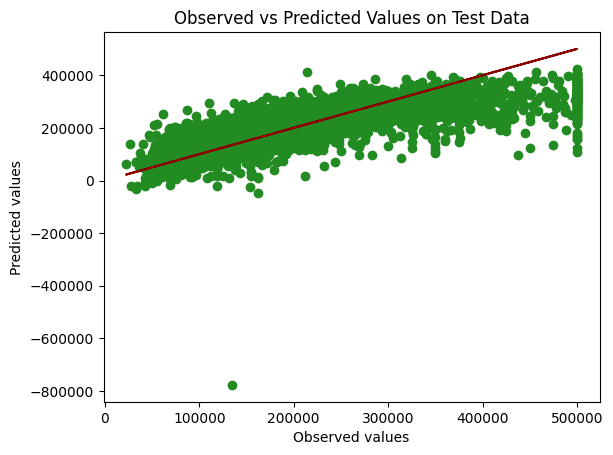

In [ ]:
# Scatter plot for observation vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color="darkred") # line for perfect preiction (true values)
plt.show()

**Positive Linear Relationship**: The red line (which represent a perfect predicted line) and the data points suggest there's a positive linear relationship between the observed and predict values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity

Assumtion 2: Random Sample

In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

Assumtion 3: Exogenity

In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]

  print(f"Correlation between residuals and {column}: {np.round(corr_coefficient,2)}")



Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: 0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


 **Durbin-Wu-Hausman Test**: For a more formal statistical test, use the Durbin-Wu-Hausman test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variable are instrumented. This test is more advanced, econometrical approach and requires identification of suitable instruments, which is not always straight

Assumtion 3: Homoskedasticty

Text(0.5, 1.0, 'Residual Vs Fitted Values')

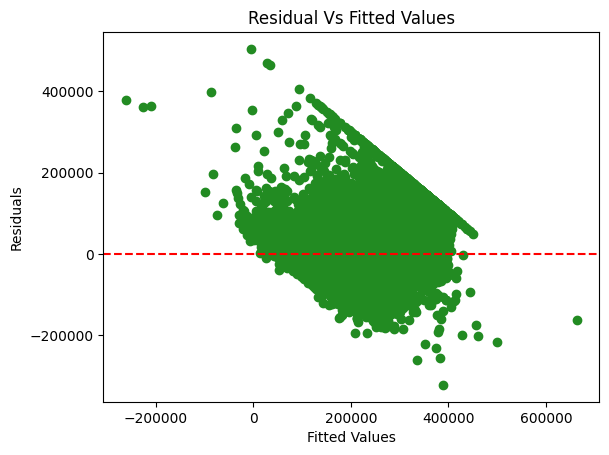

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Vs Fitted Values")

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or ommited variable bias.

Train/Test/Evaluation with Sklearn

Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StanderdScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply thesame transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make prediction on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f"MSE on Set: {mse}")
print(f"RMSE on Set: {rmse}")

MSE on Set: 4979041094.584098
RMSE on Set: 70562.3206434149
